In [94]:
%matplotlib inline

import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import os 
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.utils import shuffle
from scipy.misc import imsave
from scipy.misc import imresize
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
from PIL import Image
import pickle
# from tensorflow_vgg import vgg16
import collections
import time
import math
from sklearn.decomposition import PCA

In [ ]:
f = open('./OULP-C1V2_Pack/1f-3f_curve_data.txt','r')
message = f.read()
message = message[1:]

In [34]:
split_message = message.split('\n')

In [101]:
split_message

['Epoch: 1/3000,  Iteration: 25,  Train loss: 0.208,  Train MSE: 0.0228,  0.0s /batch.  Train Accuracy: %75.833',
 'Epoch: 1/3000,  Iteration: 50,  Train loss: 0.157,  Train MSE: 0.0147,  0.0s /batch.  Train Accuracy: %81.476',
 'Epoch: 1/3000,  Iteration: 75,  Train loss: 0.153,  Train MSE: 0.0134,  0.0s /batch.  Train Accuracy: %82.854',
 '',
 'Validation loss: 0.144,  Validation mse: 0.0127,  Validation accuracy: %83.129,',
 '',
 'Epoch: 1/3000,  Iteration: 100,  Train loss: 0.136,  Train MSE: 0.0113,  0.0s /batch.  Train Accuracy: %84.729',
 'Epoch: 1/3000,  Iteration: 125,  Train loss: 0.123,  Train MSE: 0.0092,  0.0s /batch.  Train Accuracy: %85.211',
 'Epoch: 1/3000,  Iteration: 150,  Train loss: 0.121,  Train MSE: 0.0091,  0.0s /batch.  Train Accuracy: %85.294',
 '',
 'Validation loss: 0.127,  Validation mse: 0.0099,  Validation accuracy: %84.820,',
 '',
 'Epoch: 1/3000,  Iteration: 175,  Train loss: 0.119,  Train MSE: 0.0090,  0.0s /batch.  Train Accuracy: %85.646',
 'Epoch: 1

In [137]:
train_acc = []
train_mse = []
val_acc = []
val_mse = []
train_iter = []

for each_line in split_message:
    for each_word in each_line.split(','):
    #         print(each_word[24:])
            # iteration
        if each_word[2:11] == 'Iteration':
            train_iter.append(int(each_word[13:]))
        # train_mse
        if each_word[2:11] == 'Train MSE':
            train_mse.append(float(each_word[13:]))
            # train_acc
        if each_word[16:30] == 'Train Accuracy':
            train_acc.append(float(each_word[33:]))
            # val_mse
        if each_word[2:16] == 'Validation mse':
            val_mse.append(float(each_word[18:]))
            # val_acc
        if each_word[2:21] == 'Validation accuracy':
            val_acc.append(float(each_word[24:]))
    

val_iter = np.arange(75, 58780, 75)

In [160]:
save_curve_dict = {'train_iter': train_iter, 'train_acc': train_acc, 'train_mse':train_mse, 'val_iter': val_iter, 'val_acc':val_acc,
     'val_mse': val_mse}

In [161]:
with open('../gait_data/OULP_GEI/1f-3f_Curve_points', 'wb') as f:
    np.save(f, save_curve_dict)

In [123]:
# def shrink(array):
#     new_arr = []
#     for ii, arr in enumerate(array):
#         if ii%2 != 0:
#             new_arr.append(arr)
#     return new_arr

In [135]:
# train_iter = shrink(train_iter)
# val_iter = shrink(val_iter)
# train_mse = shrink(train_mse)
# val_mse = shrink(val_mse)
# train_acc = shrink(train_acc)
# val_acc = shrink(val_acc)

In [119]:
# del train_iter[800:1100]
# del shrink_val_acc[800:1100]
# del shrink_train_acc[800:1100]
# del shrink_train_acc[800:1100]
# del shrink_train_acc[800:1100]
# del shrink_train_acc[800:1100]

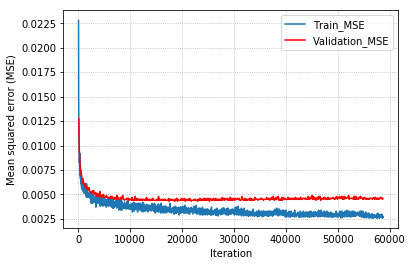

In [156]:
plt.xlabel('Iteration')
plt.ylabel('Mean squared error (MSE)')
plt.grid(linestyle=':')
plt.plot(train_iter, train_mse,  label='Train_MSE')
plt.plot(val_iter, val_mse, 'r', label='Validation_MSE')
# plt.plot(np.arange(75, 58780, 75), CMC_point_full, label='Ground Truth') 
plt.legend(loc='upper right')
# plt.ylim(np.array(CMC_point_5f).min() * 0.9, 100)    

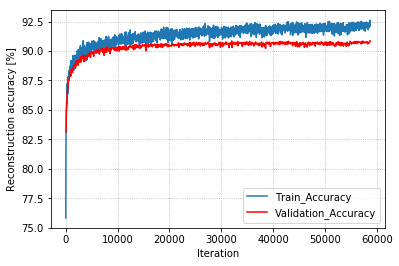

In [157]:
plt.xlabel('Iteration')
plt.ylabel('Reconstruction accuracy [%]')
plt.grid(linestyle=':')
plt.plot(train_iter, train_acc,  label='Train_Accuracy')
plt.plot(val_iter, val_acc, 'r', label='Validation_Accuracy')
# plt.plot(np.arange(75, 58780, 75), CMC_point_full, label='Ground Truth') 
plt.legend(loc='lower right')
# plt.ylim(np.array(CMC_point_5f).min() * 0.9, 100)   